### 근로기간 'Unknown' 포함, 미포함 전처리 성능비교

#### 전처리 내용
- 근로기간을 라벨인코딩으로 전처리 -> 1. 'Unknown' 포함하여 모델링 진행, 2. 'Unknown' 삭제하고 모델링 진행
- 대출기간은 수치형으로 변경
- 주택소유상태 'ANY' 제거
- 주택소유상태 원핫인코딩
- 근로기간, 대출목적 라벨인코딩
- 모델은 라벨인코딩을 했기 때문에 트리계열로만 진행, 강의에서 사용 경험이 있는 DecisionTreeClassifier, RandomForestClassifier, XGBClassifier 로 진행
- 단순하게 성능을 비교하려는 목적이기 때문에 test set은 제외하였음

1. 'Unknown' 포함하여 모델링 진행

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='AppleGothic') #한글 깨짐 방지 설정

In [2]:
df = pd.read_csv('./open/train.csv')
df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [4]:
df.shape

(96294, 15)

In [5]:
df.describe(include='all')

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
count,96294,9.629400e+04,96294,96294,96294,9.629400e+04,96294.000000,96294.000000,96294,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294
unique,96294,NaN,2,16,4,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,7
top,TRAIN_00000,NaN,36 months,10+ years,MORTGAGE,NaN,NaN,NaN,부채 통합,NaN,NaN,NaN,NaN,NaN,B
freq,1,NaN,64479,31585,47934,NaN,NaN,NaN,55150,NaN,NaN,NaN,NaN,NaN,28817
mean,NaN,1.830400e+07,NaN,NaN,NaN,9.392672e+07,19.379590,25.304827,NaN,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805,NaN
std,NaN,1.032908e+07,NaN,NaN,NaN,9.956871e+07,33.569559,12.088566,NaN,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966,NaN
min,NaN,1.200000e+06,NaN,NaN,NaN,0.000000e+00,0.000000,4.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
25%,NaN,1.020000e+07,NaN,NaN,NaN,5.760000e+07,12.650000,17.000000,NaN,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,NaN
50%,NaN,1.680000e+07,NaN,NaN,NaN,7.800000e+07,18.740000,24.000000,NaN,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000,NaN
75%,NaN,2.400000e+07,NaN,NaN,NaN,1.128000e+08,25.540000,32.000000,NaN,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000,NaN


In [6]:
df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

In [7]:
col_list1 = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수']

In [8]:
col_list2 = ['최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

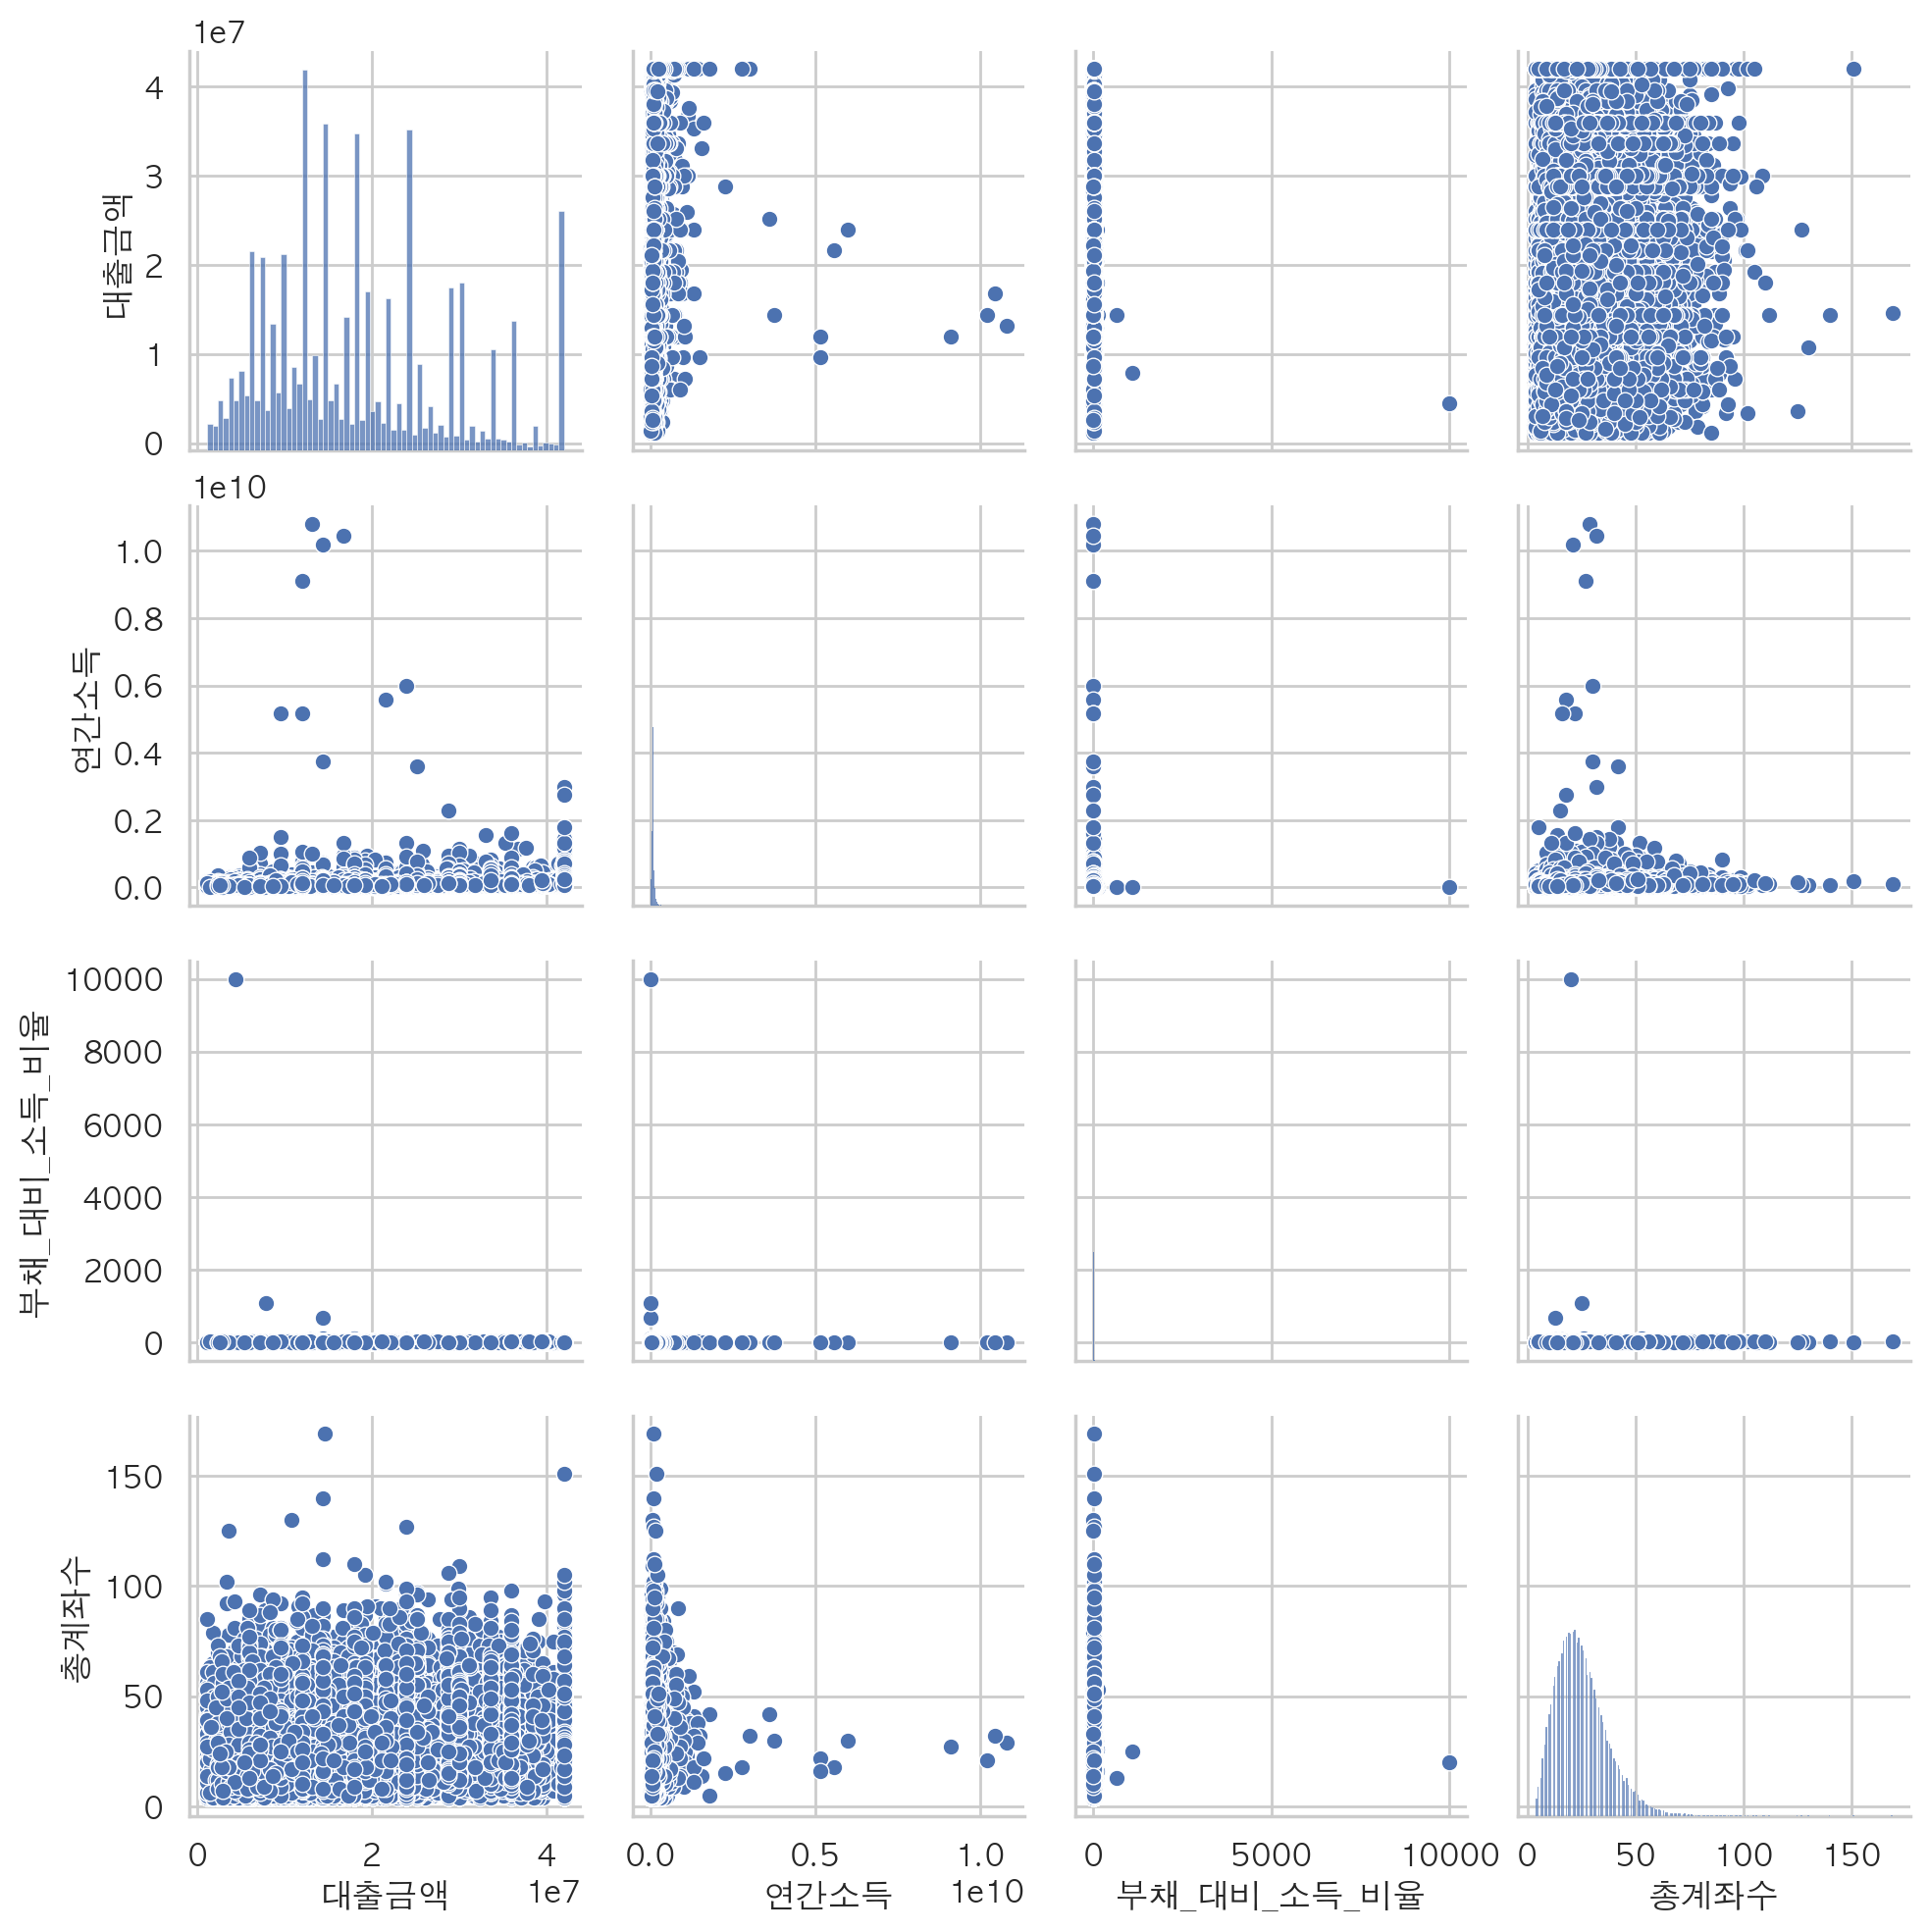

In [9]:
# 각 컬럼별로 분포 확인
sns.pairplot(data=df[col_list1])

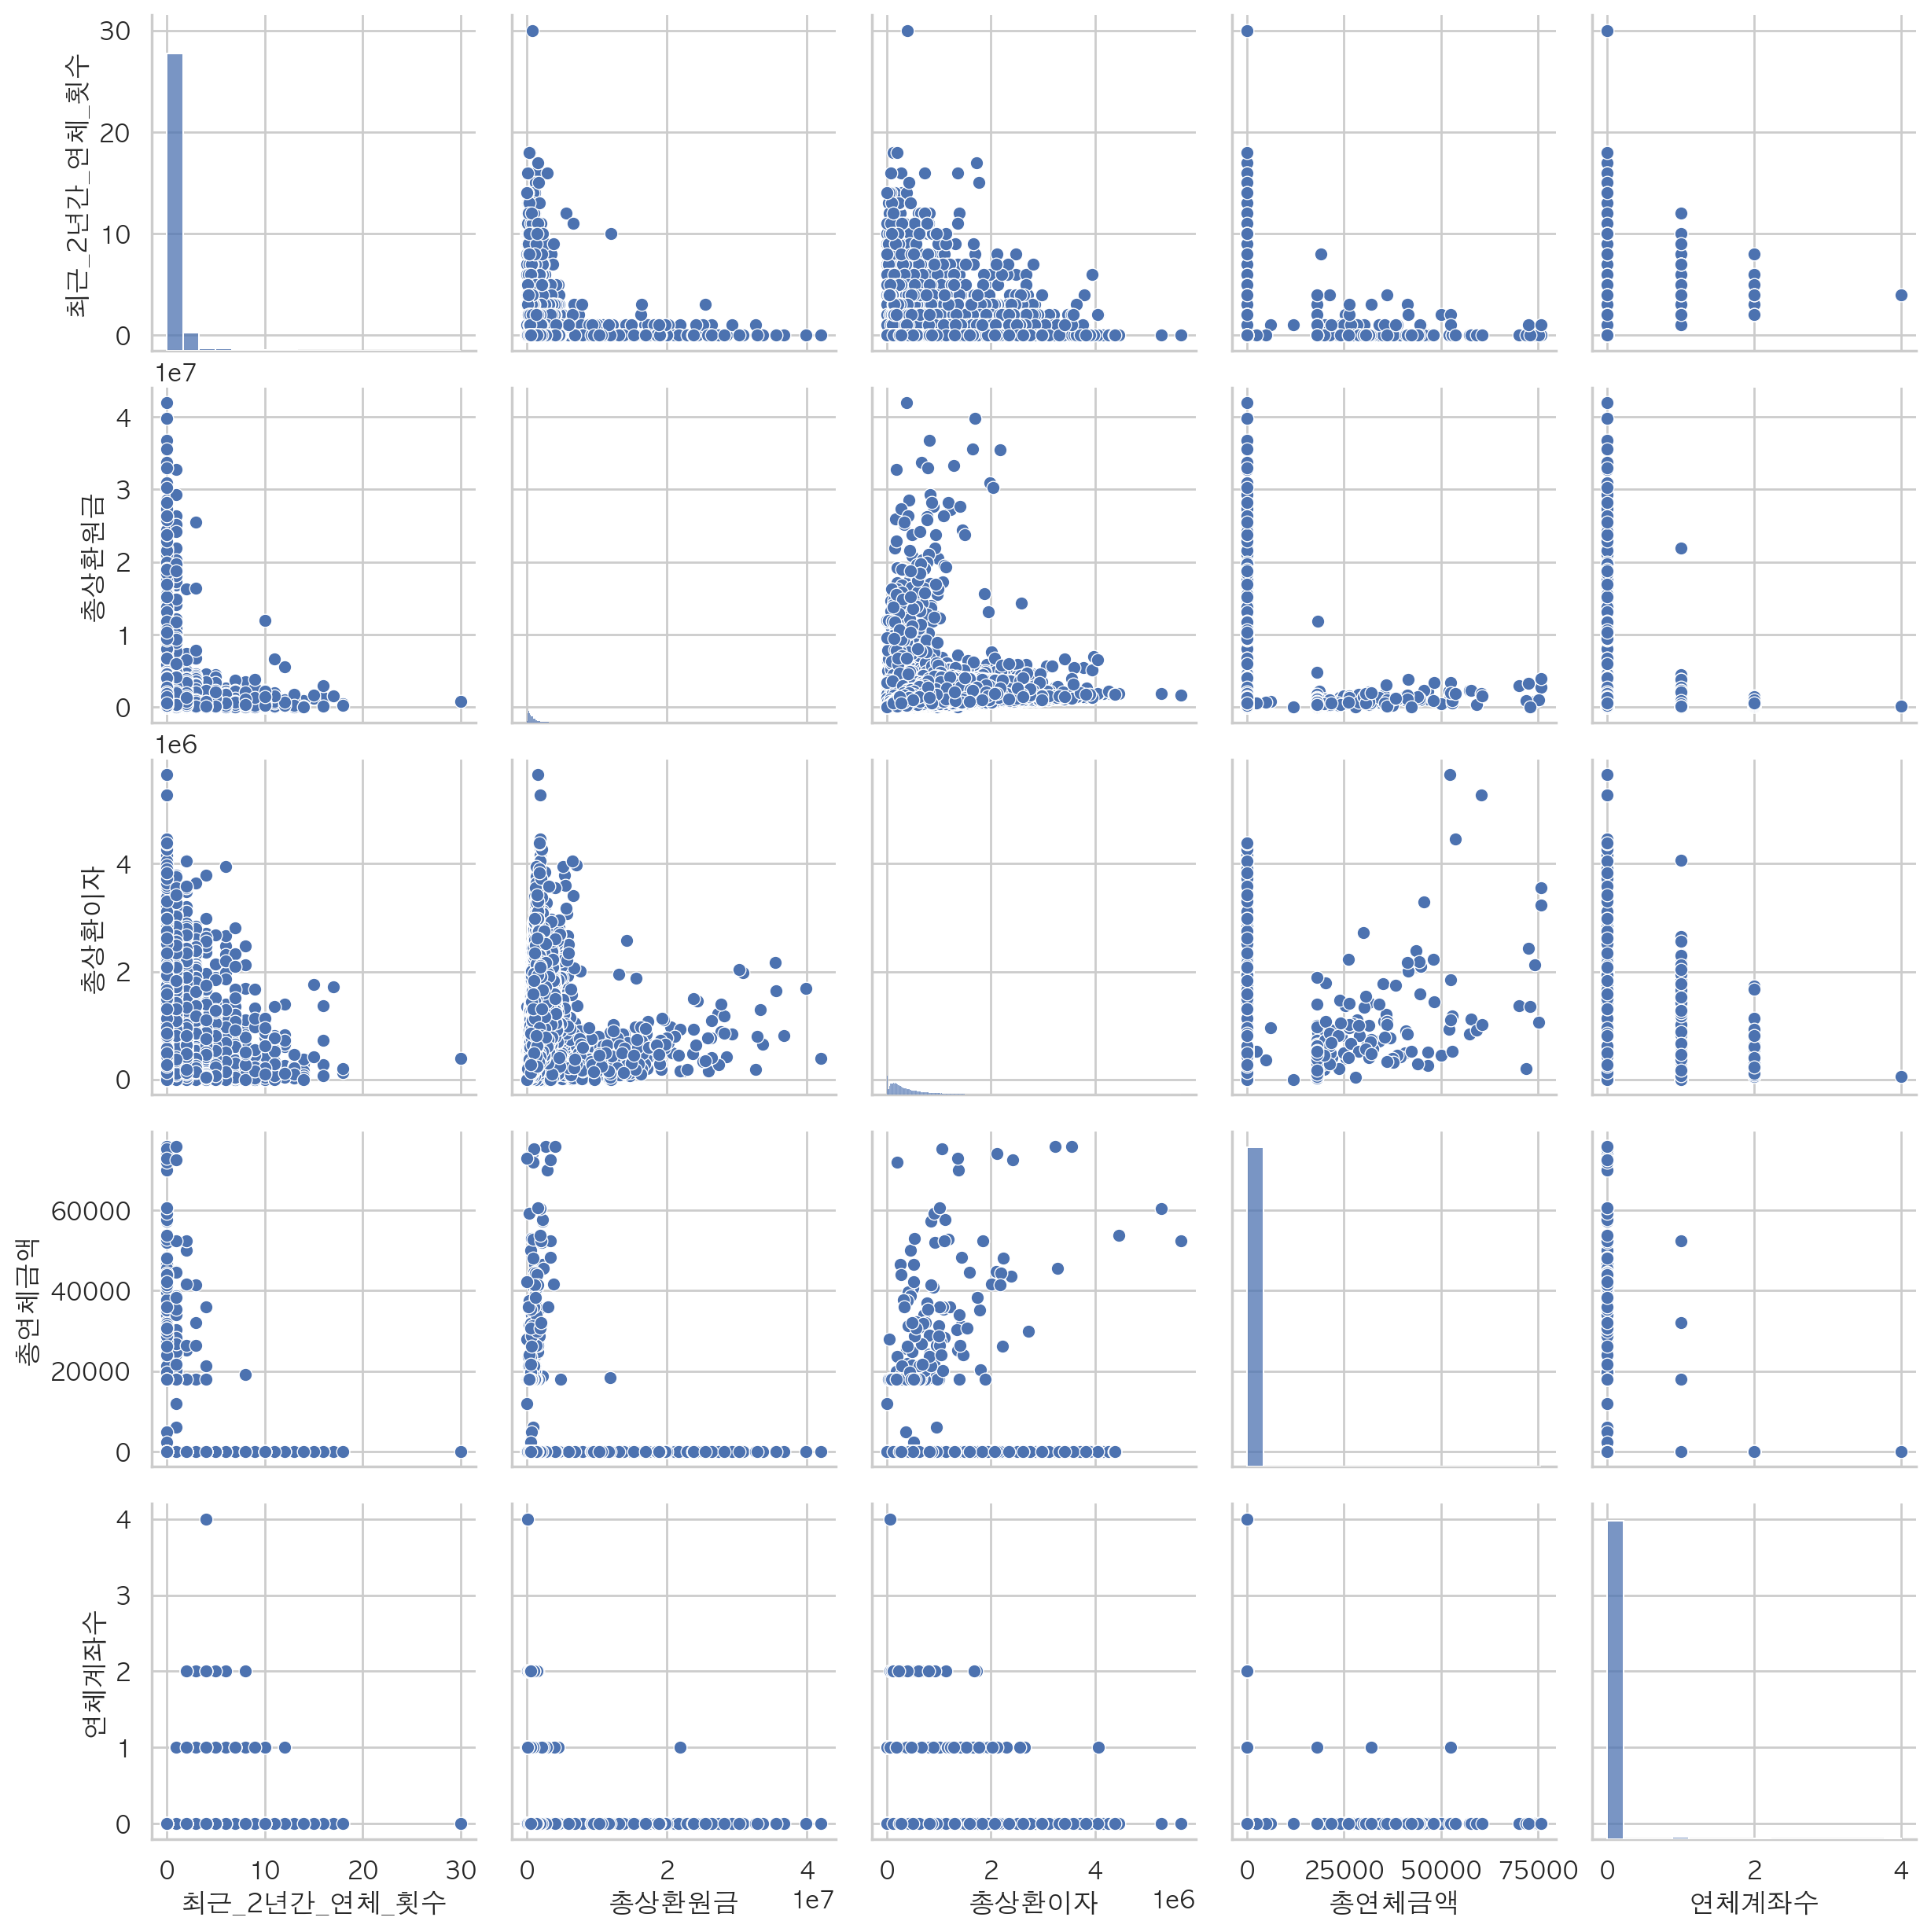

In [10]:
sns.pairplot(data=df[col_list2])

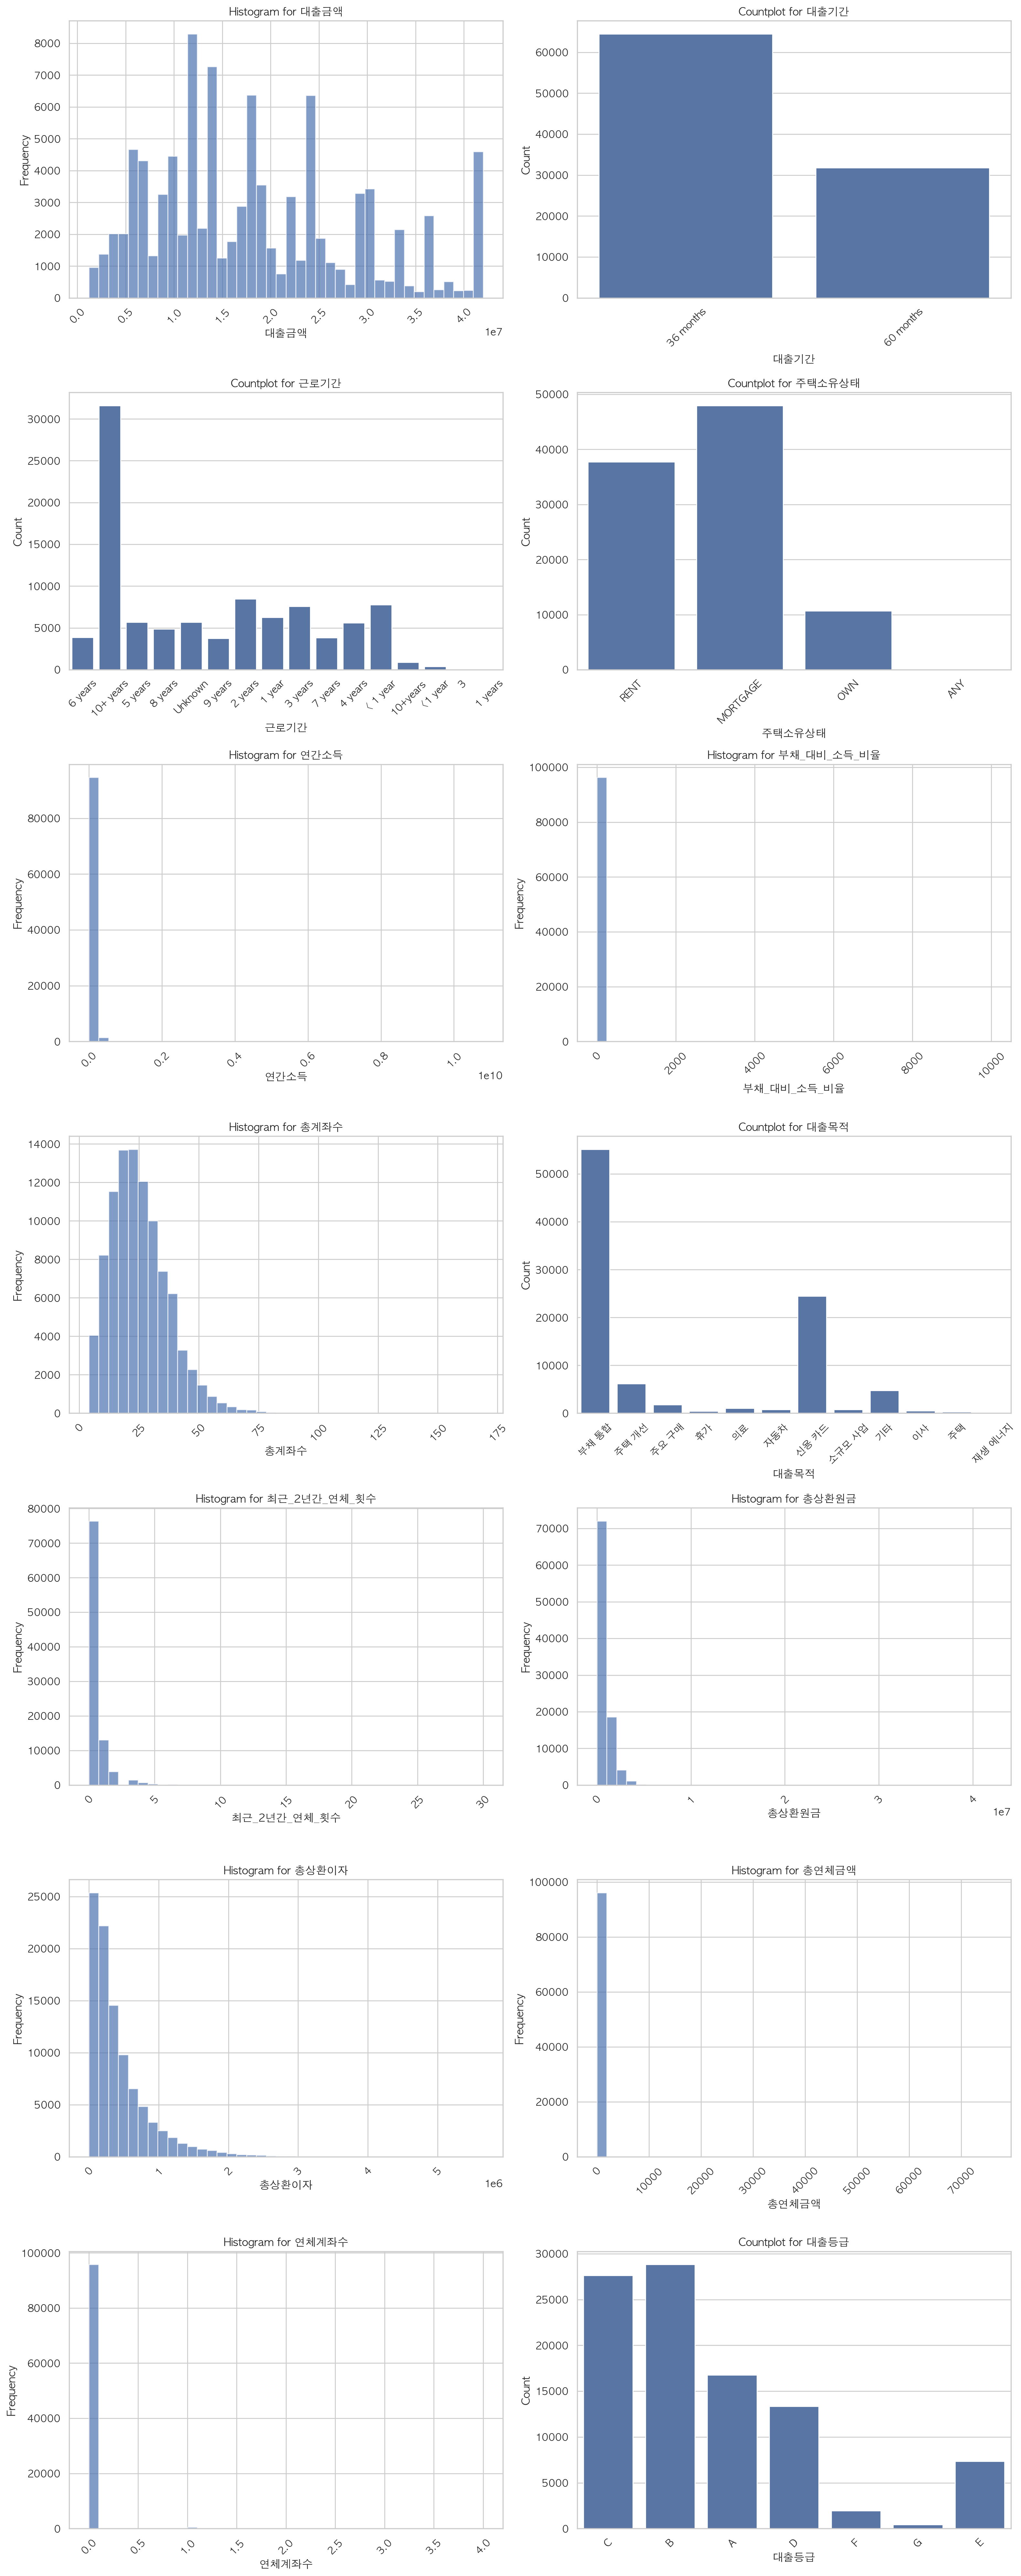

In [11]:
# 수치형 컬럼은 분포 확인을 위해 히스토그램, 범주형 데이터는 value별로 개수 확인

columns_to_plot = ['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급']

num_cols = len(columns_to_plot)
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 40))

for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # 숫자형 데이터인 경우 히스토그램 그리기
    if np.issubdtype(df[column].dtype, np.number):
        ax.hist(df[column], bins=40, alpha=0.7)
        ax.set_title(f'Histogram for {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=45)
        
    # 범주형 데이터인 경우 countplot 그리기
    else:
        sns.countplot(x=column, data=df, ax=ax)
        ax.set_title(f'Countplot for {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
        
# 레이아웃 조정
plt.tight_layout()
plt.show()

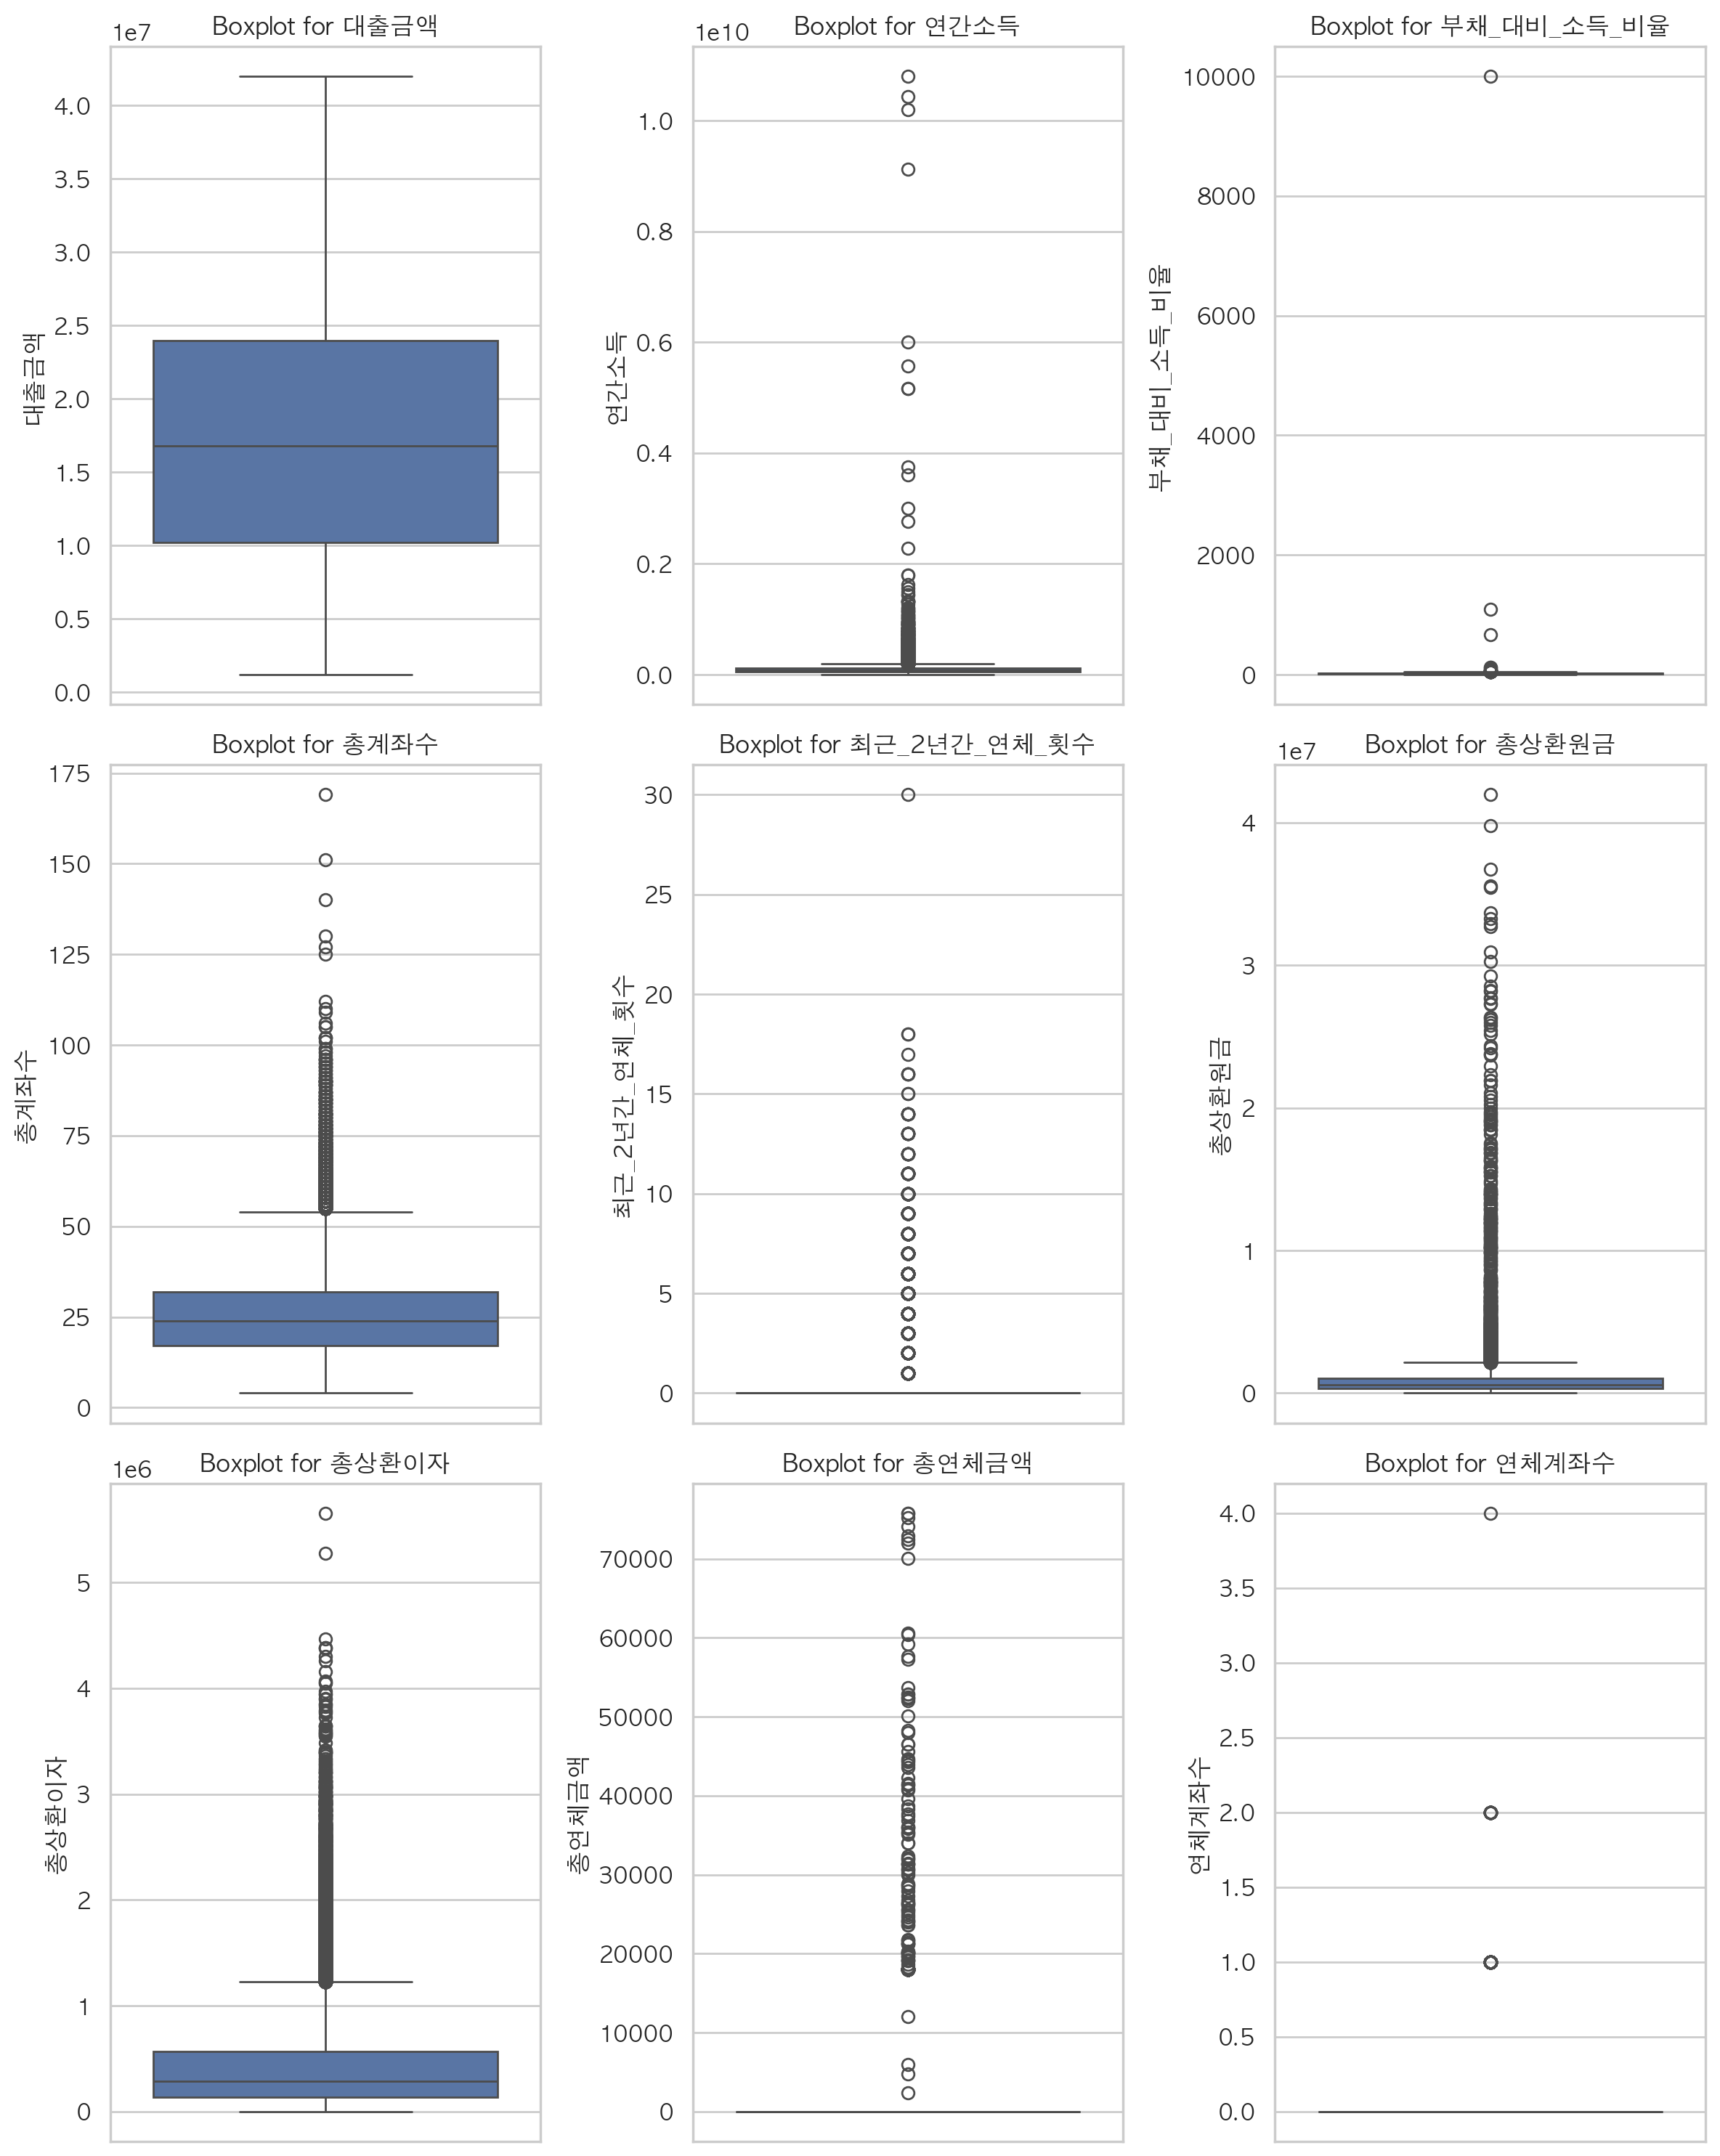

In [12]:
# 이상치 확인을 위해 박스플랏 확인

# 그래프를 그릴 열 선택
columns_to_plot = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

# 그래프를 그릴 행렬 크기 지정
num_rows, num_cols = 3, 3

# 그래프 생성
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 15))

# for 문을 사용하여 각 열에 대한 boxplot 그리기
for i, column in enumerate(columns_to_plot):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=df, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {column}')
    axes[row, col].set_ylabel(column)

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [13]:
# 대출기간 컬럼 범주형 -> 수치형으로 변경

df['대출기간'].value_counts()

 36 months    64479
 60 months    31815
Name: 대출기간, dtype: int64

In [14]:
def conv_loan_period(x):
    if x == ' 36 months':
        return 36
    else:
        return 60

In [15]:
df['대출기간'] = df['대출기간'].apply(conv_loan_period)

In [16]:
df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [17]:
# ANY값 제거 

df = df[df['주택소유상태'] != 'ANY']
df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [18]:
df.shape

(96293, 15)

In [19]:
# 근로기간 라벨 인코딩

df['근로기간'].value_counts().sort_values(ascending=False)

10+ years    31584
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: 근로기간, dtype: int64

In [20]:
# 라벨 인코딩 전에 값은 의미이지만 다른 항목으로 그룹핑 되어 있는 것을 먼저 재 그룹화

In [21]:
def unit_standardization(x):
    if (x == '10+ years') or (x == '10+years'):
        return '10년이상'
    elif x == '9 years':
        return '9'
    elif x == '8 years':
        return '8'
    elif x == '7 years':
        return '7'
    elif x == '6 years':
        return '6'
    elif x == '5 years':
        return '5'
    elif x == '4 years':
        return '4'
    elif (x == '3 years') or (x == '3'):
        return '3'
    elif x == '2 years':
        return '2'
    elif (x == '1 year') or (x == '1 years'):
        return '1'
    elif (x == '< 1 year') or (x == '<1 year'):
        return '1년이하'
    else:
        return 'Unknown'

In [22]:
df['근로기간'] = df['근로기간'].apply(unit_standardization)

In [23]:
df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60,10년이상,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [24]:
# 이제 라벨인코딩 하기
from sklearn.preprocessing import LabelEncoder

In [25]:
# LabelEncoder 인스턴스 생성

label_encoder = LabelEncoder()

In [26]:
df['근로기간'] = label_encoder.fit_transform(df['근로기간'])

In [27]:
df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36,7,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60,1,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36,6,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [28]:
label_encoder2 = LabelEncoder()

In [29]:
df['대출목적'] = label_encoder2.fit_transform(df['대출목적'])

In [30]:
df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36,7,RENT,72000000,18.90,15,1,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60,1,MORTGAGE,130800000,22.33,21,10,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36,6,MORTGAGE,96000000,8.60,14,1,0,928644,151944.0,0.0,0.0,A


In [31]:
# 주택소유상태 원핫인코딩

encoded_df = pd.get_dummies(df, columns=['주택소유상태'], prefix='en')
encoded_df.head(3)

,ID,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,en_MORTGAGE,en_OWN,en_RENT
0,TRAIN_00000,12480000,36,7,72000000,18.90,15,1,0,0,0.0,0.0,0.0,C,0,0,1
1,TRAIN_00001,14400000,60,1,130800000,22.33,21,10,0,373572,234060.0,0.0,0.0,B,1,0,0
2,TRAIN_00002,12000000,36,6,96000000,8.60,14,1,0,928644,151944.0,0.0,0.0,A,1,0,0


In [32]:
# target(y값) 라벨인코딩하기

# LabelEncoder 인스턴스 생성
label_encoder3 = LabelEncoder()

In [33]:
encoded_df['대출등급'] = label_encoder3.fit_transform(encoded_df['대출등급'])

In [34]:
# train, test set 나누기
from sklearn.model_selection import train_test_split

In [35]:
encoded_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급',
       'en_MORTGAGE', 'en_OWN', 'en_RENT'],
      dtype='object')

In [36]:
x_list = ['대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수',
       'en_MORTGAGE', 'en_OWN', 'en_RENT']

In [37]:
X = encoded_df[x_list] 
y = encoded_df['대출등급']

# Train set과 Test set으로 데이터 나누기
# test_size=0.3, random_state=42, stratify = y 으로 고정함

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [38]:
# 머신러닝모델, 평가메서드 불러오기

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score

In [39]:
# DecisionTreeClassifier 모델

model_dt = DecisionTreeClassifier(random_state=42, max_depth=17) #17로 한 이유는 17일 때 성능이 좋아서
model_dt.fit(X_train, y_train)

y_pred_train = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.944693,0.944894
test,0.836056,0.835599


In [40]:
# RandomForestClassifier 모델

model_rf = RandomForestClassifier(random_state=42, max_depth=30, n_estimators=200) #max_depth=30, n_estimators=200 정도가 효율적인 것 같아서
model_rf.fit(X_train, y_train)

y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,1.000000,1.000000
test,0.777485,0.771892


In [41]:
# XGBClassifier 모델 

model_xgb = XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=12, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb)

,accuracy,F1
train,1.000000,1.000000
test,0.879189,0.878585


2. 'Unknown' 삭제하고 모델링 진행

In [42]:
encoded_df.head(3)

,ID,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,en_MORTGAGE,en_OWN,en_RENT
0,TRAIN_00000,12480000,36,7,72000000,18.90,15,1,0,0,0.0,0.0,0.0,2,0,0,1
1,TRAIN_00001,14400000,60,1,130800000,22.33,21,10,0,373572,234060.0,0.0,0.0,1,1,0,0
2,TRAIN_00002,12000000,36,6,96000000,8.60,14,1,0,928644,151944.0,0.0,0.0,0,1,0,0


In [43]:
encoded_df.shape

(96293, 17)

In [44]:
# Unknown제거, 라벨인코딩시 11로 변경되어 11로 되어있는 행 삭제

encoded_df = encoded_df[encoded_df['근로기간'] != 11]

In [45]:
# 다시 Train set과 Test set으로 데이터 나누기
# test_size=0.3, random_state=42, stratify = y 으로 고정함

X = encoded_df[x_list] 
y = encoded_df['대출등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [46]:
# DecisionTreeClassifier 모델

model_dt = DecisionTreeClassifier(random_state=42, max_depth=17) #17로 한 이유는 17일 때 성능이 좋아서
model_dt.fit(X_train, y_train)

y_pred_train = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,0.946623,0.946776
test,0.833487,0.833135


In [47]:
# RandomForestClassifier 모델

model_rf = RandomForestClassifier(random_state=42, max_depth=30, n_estimators=200) #max_depth=30, n_estimators=200 정도가 효율적인 것 같아서
model_rf.fit(X_train, y_train)

y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

,accuracy,F1
train,1.00000,1.000000
test,0.77092,0.764931


In [48]:
# XGBClassifier 모델 

model_xgb = XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=12, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb)

,accuracy,F1
train,1.00000,1.000000
test,0.88112,0.880598


### 결론 
삭제유무에 따라 큰 차이가 보이지는 않는다. \
DecisionTreeClassifier, RandomForestClassifier 모델에서는 미묘하지만 삭제하지 않는 것이 성능이 더 좋았고\
XGBClassifier 모델은 삭제를 하는 것이 성능이 좋았다.\
하이퍼 파라미터나 컬럼 조정을 하면 성능에서 차이가 생길 가능성이 있지만 현재의 결과로만으로 봤을 때는 논리적으로 설득하기 좋은 경우를 선택하는 것도 괜찮을 것 같다.